# Homework 2: Simple Stock Analysis

The objective of this homework is to practice working with **Pandas Series**. To successfully complete this homework, you may use any resources available to you.

You need to accomplish the following tasks:
1. Download the Apple stock data for the timeframe of 1982 to today.
1. Use the %magic command to activate inline matplotlib graphs
2. Provide an overview of the `Close` series of the Apple stock.
3. Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?
3. Find the timeframes with the highest stock price surge in five days. Can you explain why these five dates?
4. Resample the `Close` series to represent business quarters with a financial year that ends in September.
3. Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. Can you explain why the larges surge happened? Visualize it.

If you use tutorials/code snippets that you find on the internet to complete this task, make sure that you reference them. Also make sure that the Jupyter notebook is free of mistakes, well-documented, and professionally formatted before you submit it.

This homework is due on **Tuesday, 23 2018**.

*This homework is based on an assignment created by Michele Samorani.*

Lets' make sure that we allow multiple outputs.

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Install the [pandas-datareader package](https://pandas-datareader.readthedocs.io/en/latest/). This package allows you to obtain stock information.

In [11]:
import pandas_datareader.data as dr
from pandas_datareader import data
import pandas as pd
import datetime


* Write a function that has the ticker symbol and the start/enddate as input and that returns a dataframe with the stock information.
* Use the function to get the stock information for Apple from 1982 to today.

In [12]:
# Define function to return stock price
def getStockPrice(tickr, startYear, startMonth, startDay, endYear, endMonth, endDay):
    start = datetime.datetime(startYear, startMonth, startDay)
    end = datetime.datetime(endYear, endMonth, endDay) 
    readData = dr.DataReader(tickr, "yahoo",start,end)
    return pd.DataFrame(readData)


In [13]:
# Return Apple stock price
aapl = getStockPrice("AAPL",1982, 1, 1, 2018, 1, 23)
aapl.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-01-04,0.395089,0.395089,0.392857,0.392857,0.321458,17813600
1982-01-05,0.377232,0.377232,0.372768,0.372768,0.305020,8960000
1982-01-06,0.370536,0.370536,0.368304,0.368304,0.301367,16520000
1982-01-07,0.343750,0.343750,0.339286,0.339286,0.277623,17511200
1982-01-08,0.354911,0.357143,0.354911,0.354911,0.290408,14151200


Use the %magic command to activate inline matplotlib graphs and plot the `Close` series.

In [23]:
#Create series with just the closing price
closePrice = aapl['Close']
closePrice.head(5)

Date
1982-01-04    0.392857
1982-01-05    0.372768
1982-01-06    0.368304
1982-01-07    0.339286
1982-01-08    0.354911
Name: Close, dtype: float64

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0.98,'Apple Stock Price')

Text(0.5,0,'Year')

Text(0,0.5,'Closing Price')

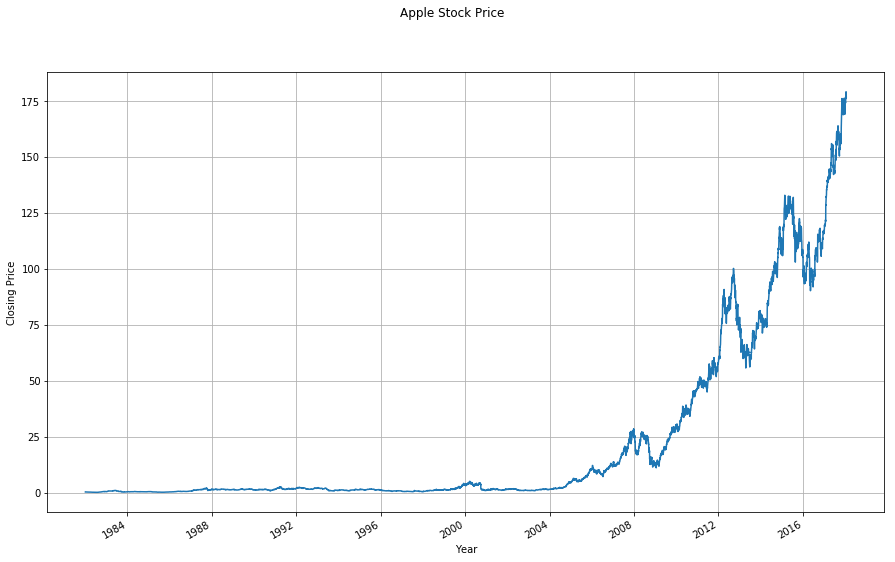

In [27]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

closePrice.plot(grid = True) # Plot the adjusted closing price of AAPL

plt.suptitle('Apple Stock Price')
plt.xlabel('Year')
plt.ylabel('Closing Price')

Provide an overview of the Close series of the Apple stock.

Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?<br><br>

**1st Method: this returns the largest value in the object.<br>
2nd Method: this sorts the values of the column; default order is ascending,  so we can use '-1'to indicate that we want the last value in the column to get the largest value. We could also set ascending order to false, and get the first and largest value in the column.<br>
3rd Method: this returns the 'n' largest values in the column, where n is the number of values you want to retrieve. For example, we only the first largest value in the column, so we would put '0' for the first item in the column.**

In [16]:
closePrice.max()

179.259995

In [17]:
closePrice.sort_values()[-1]
closePrice.sort_values(ascending=False)[0]

179.259995

179.259995

In [18]:
closePrice.nlargest()[0]

179.259995

Find the five timeframes with the highest stock price surge in five days (in % compared to the closing cost of the previous trading day). Do you notice something? Can you explain what happend during the timeframes?<br><br>

**The method used here is pct_change, which calculates the percent change with a set period; here it is set to 5, which is 5 days window. nlargest is used to get the five largest stock price surge.**<br><br>

**Highest surge happened within three days of eachother, for example, in 1997, highest surge time frames were consecutively starting August 1st, 2nd, and 3rd; in 1998, highest surge was between January 1st and 6th, as well as January 3rd and 8th. These are not sudden surgest that happen over one day, but has a pattern that starts to rise on day one and continues to reach its peak, then finally starts to go downward.**

In [29]:
priceChange = closePrice.pct_change(periods=5)
priceChange.nlargest(5)

Date
1997-08-07    0.667858
1997-08-06    0.514388
1998-01-06    0.442857
1997-08-08    0.397393
1998-01-08    0.385715
Name: Close, dtype: float64

In [59]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
#qrt = closePrice.resample('Q').mean().plot


Populating the interactive namespace from numpy and matplotlib


Resample the Close series to represent business quarters with a financial year that ends in September.<br><br>

**We are taking a date cut-off from 1982 October, because since financial year ends in September, there is not enough data to take and do comparison if Apple stocks started in January 1982.**

In [81]:
# Find quarterly average
qrt = closePrice.resample('Q').mean()

In [112]:
# With resampling, Pandas pads series with mock data; we set a limit and cut off financial year to September
yrEnd = qrt['1982-10-01':'2017-09-30']

Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. 
Can you explain why the largest surge happened?.<br><br>

**Apple was newly found in 1980, trading at two dollars per share, and the market was very optimistic. Right up until 1983 before Steve Jobs left, stock price has be risen to a peak of eight dollars per share. There is a sharp dive in 1985 when Jobs left the company. In 2004, there is a sharp bump in stock price when the new and revamped iPod mini hit the market; many investors jumped onto the bandwagon. See source list for full article (Fortune.com)**

In [114]:
# Calculate % change from quarter to quarter, find those with change greater than 100%
qrtSurge = ((qrt.shift(-3)- qrt) / qrt )
surge = qrtSurge[qrtSurge>1]
surge.sort_values(ascending=False)


Date
1982-09-30    2.444128
2004-06-30    1.757936
1982-06-30    1.746507
1999-06-30    1.679568
1986-12-31    1.558831
1999-03-31    1.341118
2004-03-31    1.309986
2004-09-30    1.280507
1986-09-30    1.234055
2009-03-31    1.108237
1997-12-31    1.076402
1985-09-30    1.074833
2007-03-31    1.017471
Name: Close, dtype: float64

Visualize the stock price for the quarters with the highest price surge.

Text(0.5,0.98,'Apple Quarterly Stock Price Surge > 100%')

Text(0.5,0,'Year')

Text(0,0.5,'% Surge')

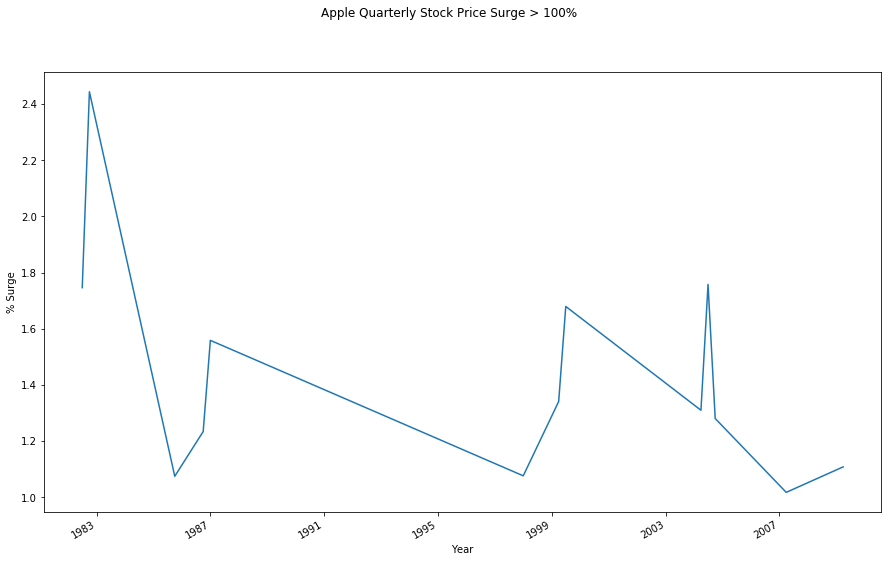

In [113]:
# Plot the quarterly surges greater than 100%
surge.plot()
plt.suptitle('Apple Quarterly Stock Price Surge > 100%')
plt.xlabel('Year')
plt.ylabel('% Surge')